# SpotiData Project 
# ------------------------

# The most streamed songs of all time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pprint import pprint
import requests
from config import ClientID,ClientSecret
import random
import scipy.stats as stats

In [3]:
#Import csv
songs_csv=pd.read_csv("Resources/Most-Streamed-Songs-All-Time.csv")
songs_csv.head()

,#,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [4]:
#format
songs_csv.rename(columns={"#":"Ranking"},inplace=True)
songs_csv.head()

,Ranking,Cover,Artist,Title,Streams,Daily,Year
0,1,NaN,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,NaN,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,NaN,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,NaN,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,NaN,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019


In [5]:
# remove columns we don't need
# plus TOP 10
songs = songs_csv[["Ranking","Artist","Title","Streams","Daily","Year"]]
songs.head(10)

,Ranking,Artist,Title,Streams,Daily,Year
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019
5,6,Post Malone,rockstar (feat. 21 Savage),"2,442,258,154","651,617",2017
6,7,Lewis Capaldi,Someone You Loved,"2,407,449,362","1,010,391",2018
7,8,Lil Nas X,Old Town Road,"2,368,821,828","735,043",2019
8,9,Billie Eilish,bad guy,"2,351,448,849","745,628",2019
9,10,The Chainsmokers,Closer,"2,342,653,508","725,751",2016


In [6]:
# from which year are the most played songs on spotify?
years = songs["Year"].value_counts()
years

2017    10
2019    10
2018    10
2016     8
2015     3
2013     2
2014     2
2020     2
1975     1
2012     1
2021     1
Name: Year, dtype: int64

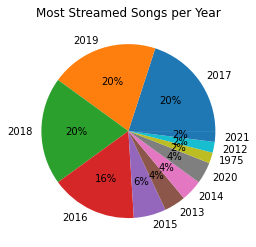

In [10]:
#PIE CHART Most Streamed Songs per Year
pct_year = plt.pie(years, labels=years.index, autopct='%1.0f%%') 
plt.title("Most Streamed Songs per Year")
plt.savefig("Figures/MostStreamedSongs/Most Streamed Songs per Year.png")

In [11]:
# There is only one old song, it's from 1975.
songs.loc[songs["Year"]==1975,:]

,Ranking,Artist,Title,Streams,Daily,Year
25,26,Queen,Bohemian Rhapsody,"1,882,588,704","911,004",1975


## Spotify API

In [12]:
#API KEY - API AUTH
# ClientID and ClientSecret in config.py 
# !!!!! to make it work, you should have your own config.py

AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [13]:
#url
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [14]:
#test
searchtype="track"
params={"q":"Shape of You",
       "type":{searchtype}}
# headers = api key
info=requests.get(search_BASE_URL ,params=params, headers=headers).json()
#pprint(info)

In [69]:
#get track ID
track_id=info["tracks"]['items'][0]['id']
track_id

'7qiZfU4dY1lWllzX7mPBI3'

In [70]:
# check song with ID
# https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3 

### GET Audio Analysis

In [71]:
# TEST
# https://developer.spotify.com/console/get-audio-features-several-tracks/?ids=7qiZfU4dY1lWllzX7mPBI3 
# curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=7qiZfU4dY1lWllzX7mPBI3"

feature_url = BASE_URL + "audio-features?ids="
song_analysis=requests.get(feature_url+track_id, headers=headers).json()
pprint(song_analysis)

{'audio_features': [{'acousticness': 0.581,
                     'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7qiZfU4dY1lWllzX7mPBI3',
                     'danceability': 0.825,
                     'duration_ms': 233713,
                     'energy': 0.652,
                     'id': '7qiZfU4dY1lWllzX7mPBI3',
                     'instrumentalness': 0,
                     'key': 1,
                     'liveness': 0.0931,
                     'loudness': -3.183,
                     'mode': 0,
                     'speechiness': 0.0802,
                     'tempo': 95.977,
                     'time_signature': 4,
                     'track_href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
                     'type': 'audio_features',
                     'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
                     'valence': 0.931}]}


In [72]:
# test: ask one feature
song_analysis["audio_features"][0]["acousticness"]

0.581

## Function look_for_id of ONE song

In [73]:
# Function that ask to the API the ID of a song
def look_for_id(song):
    
    try:
        url = 'https://api.spotify.com/v1/search?' 
        search_type = "track"
        params = {"q":{song},
                  "type":{search_type}}
        info = requests.get(url, params=params, headers=headers).json()
        track_id = info["tracks"]['items'][0]['id']
        #return track_id
    
    except (KeyError, IndexError):                                                  
        track_id = "nan"
    
    return track_id

In [74]:
# LIST of most streamed songs
only_songs = songs["Title"]
only_songs[10]

'Sunflower - Spider-Man: Into the Spider-Verse'

In [75]:
# TEST function
look_for_id(only_songs[10])

'3KkXRkHbMCARz0aVfEt68P'

In [76]:
# TEST function error
look_for_id("blableblibloblu")

'nan'

## Function look for ID for a LIST of songs

In [77]:
# function that receives a list of songs and returns a list of spotify ids for those songs
def list_of_ids(songs):
    list_ids = []
    for song in songs:
        song_id = look_for_id(song)
        list_ids.append(song_id)
    return list_ids

### GET list songs ID

In [78]:
list_songs_ids = list_of_ids(only_songs)
list_songs_ids

['7qiZfU4dY1lWllzX7mPBI3',
 '6cXTXwac0V1OkbSfvKDEN2',
 '6habFhsOp2NvshLv26DqMb',
 '0VjIjW4GlUZAMYd2vXMi3b',
 '2XU0oxnq2qxCpomAAuJY8K',
 '0e7ipj03S05BNilyu5bRzt',
 '7qEHsqek33rTcFNT9PFqLf',
 '2YpeDb67231RjR0MgVLzsG',
 '2Fxmhks0bxGSBdJ92vM42m',
 '7BKLCZ1jbUBVqRi2FVlTVw',
 '3KkXRkHbMCARz0aVfEt68P',
 '1zi7xx7UVEFkmKfv06H8x0',
 '0pqnGHJpmpxLKifKRmU6WP',
 '6gBFPUFcJLzWGx4lenP6h2',
 '2eookY4b8oNv2Y6GFzklqS',
 '5uCax9HTNlzGybIStD3vDh',
 '3U4isOIWM3VvDubwSI3y7a',
 '3JLq5u35AgMkYkpRzFIDCJ',
 '1rfofaqEpACxVEHIZBJe6W',
 '3S4px9f4lceWdKf0gWciFu',
 '3PfIrDoz19wz7qK7tYeu62',
 '285pBltuF7vW8TeWk8hdRR',
 '6DCZcSspjsKoFjzjrWoCdn',
 '6RUKPb4LETWmmr3iAEQktW',
 '5s7jBWHnSpyzQdxsnCxgej',
 '7tFiyTwD0nx5a1eklYtX2J',
 '7MXVkk9YMctZqd1Srtv4MB',
 '5nujrmhLynf4yMoMtj8AQF',
 '1zB4vmk8tFRmM9UULNzbLB',
 '7KXjTSCq5nL1LoYtL7XAwS',
 '3ee8Jmje8o58CHK66QrVC2',
 '1i1fxkWeaMmKEB4T7zqbzK',
 '0aOZa47Xx3kueBaXqIVS4b',
 '35mf2lPMWC8PsZGHvtU8cI',
 '1CS7Sd1u5tWkstBhpssyjP',
 '2VxeLyX666F8uXCJ0dZF8B',
 '3vv9phIu6Y1vX3jcqaGz5Z',
 

## Function Audio Analysis

In [79]:
def audio_features(list_songs_id):
    
    AUTH_URL = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(AUTH_URL, {
        'grant_type': 'client_credentials',
        'client_id': ClientID,
        'client_secret': ClientSecret,    })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token) }
    #AUTH####################################################################

    feature_url = "https://api.spotify.com/v1/audio-features?ids="
    
    acousticness = []
    danceability = []
    duration_ms = []
    energy = []
    instrumentalness = []
    liveness = []
    loudness = []
    speechiness = []
    tempo = []
    valence = []
    
    for song_id in list_songs_id:
        
        song_analysis = requests.get(feature_url+song_id, headers=headers).json()
        
        #FEATURES
        acousticness.append(song_analysis["audio_features"][0]["acousticness"])
        danceability.append(song_analysis["audio_features"][0]["danceability"])
        duration_ms.append(song_analysis["audio_features"][0]["duration_ms"])
        energy.append(song_analysis["audio_features"][0]["energy"])
        instrumentalness.append(song_analysis["audio_features"][0]["instrumentalness"])
        liveness.append(song_analysis["audio_features"][0]["liveness"])
        loudness.append(song_analysis["audio_features"][0]["loudness"])
        speechiness.append(song_analysis["audio_features"][0]["speechiness"])
        tempo.append(song_analysis["audio_features"][0]["tempo"])
        valence.append(song_analysis["audio_features"][0]["valence"])

    # CREATE DICTIONARY    
    audio_features_dic = {
                            "Song_ID" : list_songs_id,
                            "Acousticness" : acousticness,
                            "Danceability" : danceability,
                            "Duration" : duration_ms,
                            "Energy" : energy,
                            "Instrumentalness" : instrumentalness,
                            "Liveness" : liveness,
                            "Loudness" : loudness,
                            "Speechiness" : speechiness,
                            "Tempo" : tempo,
                            "Valence" : valence
    }
    
    #CREATE DATAFRAME
    audio_features_df = pd.DataFrame(audio_features_dic)
    return audio_features_df


### GET Audio Analysis

In [80]:
audio_features_df = audio_features(list_songs_ids)
audio_features_df

,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,7qiZfU4dY1lWllzX7mPBI3,0.581000,0.825,233713,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,6cXTXwac0V1OkbSfvKDEN2,0.162000,0.598,263400,0.448,0.000000,0.1060,-6.312,0.0232,95.009,0.168
2,6habFhsOp2NvshLv26DqMb,0.198000,0.655,229360,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,0VjIjW4GlUZAMYd2vXMi3b,0.001460,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,2XU0oxnq2qxCpomAAuJY8K,0.692000,0.824,209438,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513
5,0e7ipj03S05BNilyu5bRzt,0.124000,0.585,218147,0.520,0.000070,0.1310,-6.136,0.0712,159.801,0.129
6,7qEHsqek33rTcFNT9PFqLf,0.751000,0.501,182161,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.446
7,2YpeDb67231RjR0MgVLzsG,0.053300,0.878,157067,0.619,0.000000,0.1130,-5.560,0.1020,136.041,0.639
8,2Fxmhks0bxGSBdJ92vM42m,0.328000,0.701,194088,0.425,0.130000,0.1000,-10.965,0.3750,135.128,0.562
9,7BKLCZ1jbUBVqRi2FVlTVw,0.414000,0.748,244960,0.524,0.000000,0.1110,-5.599,0.0338,95.010,0.661


In [81]:
# add song_ID to df1 (songs)
songs["Song_ID"] = list_songs_ids
songs.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,6cXTXwac0V1OkbSfvKDEN2
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K


### Merge base df with Spotify API df

In [82]:
# merge df1 with df2 by ID
songs_analysed = pd.merge(songs, audio_features_df, left_on="Song_ID", right_on="Song_ID")
songs_analysed.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,233713,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,6cXTXwac0V1OkbSfvKDEN2,0.16200,0.598,263400,0.448,0.000000,0.1060,-6.312,0.0232,95.009,0.168
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb,0.19800,0.655,229360,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K,0.69200,0.824,209438,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513


In [83]:
#CHANGE DURATION = milliseconds to minutes
songs_analysed["Duration"] = songs_analysed["Duration"]/60000
songs_analysed.head()

,Ranking,Artist,Title,Streams,Daily,Year,Song_ID,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,1,Ed Sheeran,Shape of You,"3,568,884,811","957,825",2017,7qiZfU4dY1lWllzX7mPBI3,0.58100,0.825,3.895217,0.652,0.000000,0.0931,-3.183,0.0802,95.977,0.931
1,2,Ed Sheeran,Perfect,"2,992,732,560","1,391,839",2017,6cXTXwac0V1OkbSfvKDEN2,0.16200,0.598,4.390000,0.448,0.000000,0.1060,-6.312,0.0232,95.009,0.168
2,3,Luis Fonsi,Despacito,"2,977,102,893","693,132",2017,6habFhsOp2NvshLv26DqMb,0.19800,0.655,3.822667,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
3,4,The Weeknd,Blinding Lights,"2,974,748,777","1,730,130",2019,0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,3.334000,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334
4,5,Tones And I,Dance Monkey,"2,576,954,079","799,995",2019,2XU0oxnq2qxCpomAAuJY8K,0.69200,0.824,3.490633,0.588,0.000104,0.1490,-6.400,0.0924,98.027,0.513


In [84]:
descr = songs_analysed.describe()
descr

,Ranking,Year,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,25.50000,2016.300000,0.282005,0.656580,3.636801,0.590580,0.005734,0.158110,-6.187320,0.090550,117.85808,0.468740
std,14.57738,6.257241,0.285448,0.145988,0.672098,0.171129,0.026065,0.109046,2.004411,0.092654,30.50548,0.212092
min,1.00000,1975.000000,0.000282,0.332000,2.363433,0.225000,0.000000,0.067000,-10.965000,0.023200,74.89700,0.120000
25%,13.25000,2016.000000,0.044425,0.567500,3.255154,0.448250,0.000000,0.095025,-7.045000,0.035150,95.84350,0.328000
50%,25.50000,2017.000000,0.159500,0.679500,3.546192,0.616000,0.000000,0.118500,-5.644000,0.051000,108.96200,0.446000
75%,37.75000,2018.750000,0.535500,0.773250,3.971783,0.730000,0.000080,0.149000,-4.920250,0.102000,135.81275,0.583750
max,50.00000,2021.000000,0.934000,0.908000,5.905333,0.869000,0.134000,0.552000,-3.183000,0.438000,186.00300,0.931000


### Median


In [85]:
median = descr.loc["50%"]
median

Ranking               25.500000
Year                2017.000000
Acousticness           0.159500
Danceability           0.679500
Duration               3.546192
Energy                 0.616000
Instrumentalness       0.000000
Liveness               0.118500
Loudness              -5.644000
Speechiness            0.051000
Tempo                108.962000
Valence                0.446000
Name: 50%, dtype: float64

## Medians  +  documentation of features meanings


### acousticness = 0.14900
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### danceability = 0.68750  (most danceable)
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
 
### duration = 3.53145
The duration of the track in milliseconds. (I have changed it to minutes)
  
### energy = 0.62000 (energetic tracks)
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
 
### instrumentalness = 0.00000 (mostly vocal content)
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### liveness = 0.11950  
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
 
### loudness = -5.80650
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
 
### speechiness = 0.05485  
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### tempo = 112.58750 (moderate)
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
moderate is 108–120 BPM
fast is 120–168 BPM
faster is 168–200 BPM

### valence = 0.44600
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [86]:
songs_analysed.columns

Index(['Ranking', 'Artist', 'Title', 'Streams', 'Daily', 'Year', 'Song_ID',
       'Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence'],
      dtype='object')

In [87]:
columns_analysis = ['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']


## Looking for correlations 

Text(0.5, 1.0, 'Correlation between Danceability and Ranking \n of Most Streamed Songs')

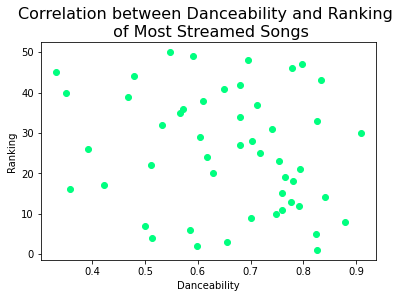

In [88]:
#plots
plt.scatter(songs_analysed["Danceability"], songs_analysed["Ranking"], marker="o", color="springgreen")
plt.xlabel("Danceability")
plt.ylabel("Ranking")
fontdict = {'fontsize': 16}
plt.title("Correlation between Danceability and Ranking \n of Most Streamed Songs", fontdict=fontdict)
#no correlation

Text(0.5, 1.0, 'Correlation between Acousticness and Ranking \n of Most Streamed Songs')

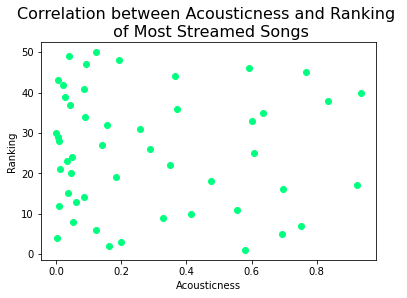

In [89]:
plt.scatter(songs_analysed["Acousticness"], songs_analysed["Ranking"], marker="o", color="springgreen")
plt.xlabel("Acousticness")
plt.ylabel("Ranking")
fontdict = {'fontsize': 16}
plt.title("Correlation between Acousticness and Ranking \n of Most Streamed Songs", fontdict=fontdict)
#no correlation

Text(0.5, 1.0, 'Correlation between Valence and Ranking \n of Most Streamed Songs')

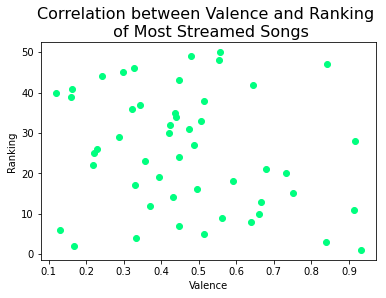

In [90]:
plt.scatter(songs_analysed["Valence"], songs_analysed["Ranking"], marker="o", color="springgreen")
plt.xlabel("Valence")
plt.ylabel("Ranking")
fontdict = {'fontsize': 16}
plt.title("Correlation between Valence and Ranking \n of Most Streamed Songs", fontdict=fontdict)
#no correlation

Text(0.5, 1.0, 'Correlation between Duration and Ranking \n of Most Streamed Songs')

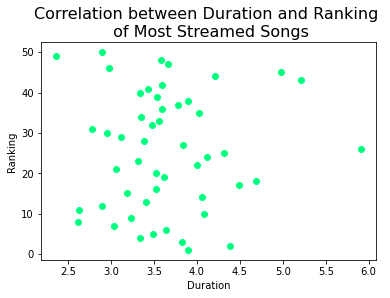

In [91]:
plt.scatter(songs_analysed["Duration"], songs_analysed["Ranking"], marker="o", color="springgreen")
plt.xlabel("Duration")
plt.ylabel("Ranking")
fontdict = {'fontsize': 16}
plt.title("Correlation between Duration and Ranking \n of Most Streamed Songs", fontdict=fontdict)
#no correlation

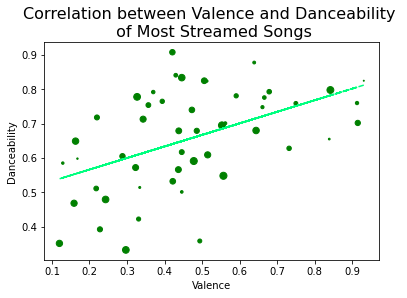

In [92]:
plt.scatter(songs_analysed["Valence"], songs_analysed["Danceability"], 
            marker="o", color="green", s=songs_analysed["Ranking"])
plt.xlabel("Valence")
plt.ylabel("Danceability")
#line
slope, intercept, r, p, se = st.linregress(songs_analysed["Valence"],songs_analysed["Danceability"])
y_fit = slope* songs_analysed["Valence"] + intercept
plt.plot(songs_analysed["Valence"], y_fit, "--", color="springgreen")
#format
fontdict = {'fontsize': 16}
plt.title("Correlation between Valence and Danceability \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Danceability Valence Correlation.png")


In [93]:
songs_corr = songs_analysed.corr()
songs_corr

,Ranking,Year,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Ranking,1.000000,0.012641,-0.042256,-0.196287,0.027010,0.090207,-0.080226,0.197660,-0.078649,0.043479,-0.013818,-0.225185
Year,0.012641,1.000000,-0.097109,0.314724,-0.592815,0.220251,0.058474,-0.082211,0.285894,0.071041,-0.080855,0.248583
Acousticness,-0.042256,-0.097109,1.000000,-0.367490,0.230447,-0.722755,-0.087188,-0.178669,-0.472463,0.104833,-0.327310,-0.111223
Danceability,-0.196287,0.314724,-0.367490,1.000000,-0.288566,0.268331,-0.010896,-0.013827,0.333196,0.138226,-0.013066,0.489073
Duration,0.027010,-0.592815,0.230447,-0.288566,1.000000,-0.295151,-0.141917,0.042246,-0.205433,-0.041186,-0.082408,-0.253024
Energy,0.090207,0.220251,-0.722755,0.268331,-0.295151,1.000000,0.050514,0.063871,0.708221,-0.110066,0.290406,0.346227
Instrumentalness,-0.080226,0.058474,-0.087188,-0.010896,-0.141917,0.050514,1.000000,-0.063125,-0.169924,0.260304,0.224881,-0.048577
Liveness,0.197660,-0.082211,-0.178669,-0.013827,0.042246,0.063871,-0.063125,1.000000,-0.136627,0.020339,-0.266830,-0.174461
Loudness,-0.078649,0.285894,-0.472463,0.333196,-0.205433,0.708221,-0.169924,-0.136627,1.000000,-0.399856,0.087809,0.426296
Speechiness,0.043479,0.071041,0.104833,0.138226,-0.041186,-0.110066,0.260304,0.020339,-0.399856,1.000000,0.222625,0.062203


In [94]:
songs_corr_sort = songs_corr.unstack().sort_values(ascending = False).head(20)
songs_corr_sort

Ranking           Ranking             1.000000
Year              Year                1.000000
Tempo             Tempo               1.000000
Speechiness       Speechiness         1.000000
Loudness          Loudness            1.000000
Liveness          Liveness            1.000000
Instrumentalness  Instrumentalness    1.000000
Energy            Energy              1.000000
Duration          Duration            1.000000
Danceability      Danceability        1.000000
Acousticness      Acousticness        1.000000
Valence           Valence             1.000000
Loudness          Energy              0.708221
Energy            Loudness            0.708221
Danceability      Valence             0.489073
Valence           Danceability        0.489073
Loudness          Valence             0.426296
Valence           Loudness            0.426296
Energy            Valence             0.346227
Valence           Energy              0.346227
dtype: float64

## Distribution Analysis with hist()

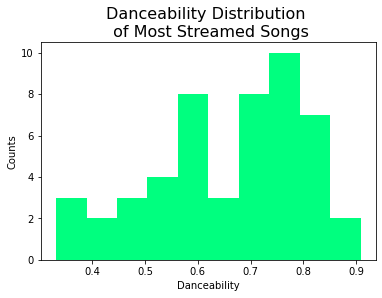

In [95]:
#Do we like less danceable music or more danceable? More danceable
plt.hist(songs_analysed["Danceability"], color="springgreen")
plt.xlabel("Danceability")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Danceability Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Danceability Distribution.png")

In [96]:
st.normaltest(songs_analysed["Danceability"])

NormaltestResult(statistic=2.9874194563227388, pvalue=0.22453813313507753)

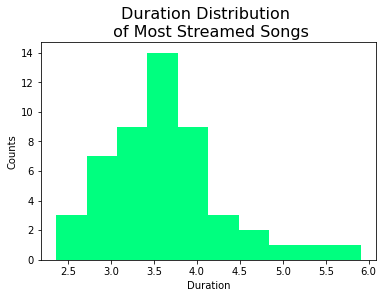

In [97]:
plt.hist(songs_analysed["Duration"], color="springgreen")
plt.xlabel("Duration")
plt.ylabel("Counts")                  
fontdict = {'fontsize': 16}
plt.title("Duration Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Duration Distribution.png")

In [98]:
st.normaltest(songs_analysed["Duration"])

NormaltestResult(statistic=12.145046454169403, pvalue=0.0023053489468198626)

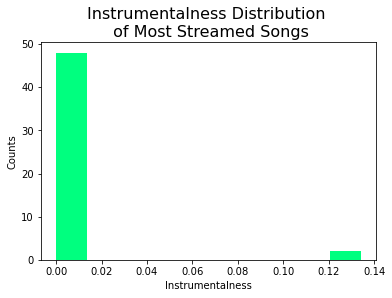

In [99]:
# Do we like vocal or instrumentalness music? 100% vocal music
plt.hist(songs_analysed["Instrumentalness"], color="springgreen")
plt.xlabel("Instrumentalness")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Instrumentalness Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Instrumentalness Distribution.png")

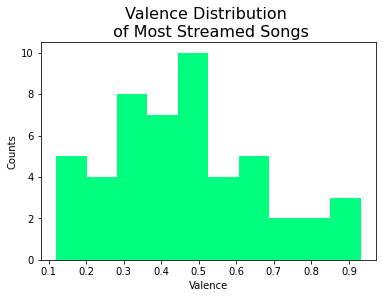

In [100]:
# Does the music we like sound more positive or more negative? In the middle, with negative trend.
plt.hist(songs_analysed["Valence"], color="springgreen")
plt.xlabel("Valence")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Valence Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Valence Distribution.png")

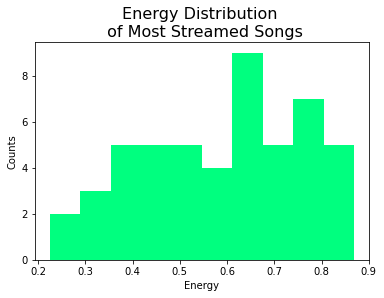

In [101]:
# Does the music we like sound more or less energetic? More energetic
plt.hist(songs_analysed["Energy"], color="springgreen")
plt.xlabel("Energy")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Energy Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Energy Distribution.png")

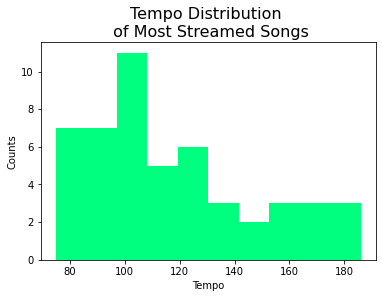

In [102]:
# How is the tempo in the music we like? 
plt.hist(songs_analysed["Tempo"], color="springgreen")
plt.xlabel("Tempo")
plt.ylabel("Counts")
fontdict = {'fontsize': 16}
plt.title("Tempo Distribution \n of Most Streamed Songs", fontdict=fontdict)
plt.savefig("Figures/MostStreamedSongs/Tempo Distribution.png")

    Genre	Typical BPM
    * Reggae	60-90
    * Hip-hop	85-115
    * Funk	    120-125
    * Pop	    100-130
    * Rock	110-140
    * Metal	100-160
    * House	118-135

-----------------------------------------------------------------

# The Top-100 songs of each year of the last 20 years (2000-2021)


In [103]:
#url for request.get
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [104]:
#importing data and cleaning
Charts=pd.read_csv("Resources/MusicCharts.csv")
Charts
Charts.rename(columns={"year":"Year",
                      "position":"Position",
                      "artist":"Artist",
                      "song":"Song"},inplace=True)
Charts=Charts[["Year","Position","Artist","Song"]]

In [105]:
#seperating into years
Year2000=Charts.loc[Charts["Year"]==2000]
Year2001=Charts.loc[Charts["Year"]==2001]
Year2002=Charts.loc[Charts["Year"]==2002]
Year2003=Charts.loc[Charts["Year"]==2003]
Year2004=Charts.loc[Charts["Year"]==2004]
Year2005=Charts.loc[Charts["Year"]==2005]
Year2006=Charts.loc[Charts["Year"]==2006]
Year2007=Charts.loc[Charts["Year"]==2007]
Year2008=Charts.loc[Charts["Year"]==2008]
Year2009=Charts.loc[Charts["Year"]==2009]
Year2010=Charts.loc[Charts["Year"]==2010]
Year2011=Charts.loc[Charts["Year"]==2011]
Year2012=Charts.loc[Charts["Year"]==2012]
Year2013=Charts.loc[Charts["Year"]==2013]
Year2014=Charts.loc[Charts["Year"]==2014]
Year2015=Charts.loc[Charts["Year"]==2015]
Year2016=Charts.loc[Charts["Year"]==2016]
Year2017=Charts.loc[Charts["Year"]==2017]
Year2018=Charts.loc[Charts["Year"]==2018]
Year2019=Charts.loc[Charts["Year"]==2019]
Year2020=Charts.loc[Charts["Year"]==2020]
Year2021=Charts.loc[Charts["Year"]==2021]

In [106]:
#creating function for retreival of spotify uri
def spotifyuri(df): 
    
    tempyear=df.iloc[0,0]
    print(f"{tempyear}")
        
    for index in df.index:

        artist1=[]
        artist1=df.loc[index,"Artist"].split(" & ")

        searchterm=f'{df.loc[index,"Song"]}'

        for art in range(len(artist1)):
            searchterm=f'{searchterm} {artist1[art]}'

        searchtype="track"
        params={"q":{searchterm},
           "type":{searchtype}}
        info=requests.get(search_BASE_URL ,params=params, headers=headers).json()

        try: 
            album=info["tracks"]["items"][0]["album"]["name"]
            df.loc[index,"Album"]=album
            uri=info["tracks"]['items'][0]['uri']
            df.loc[index,"Track URI"]=uri
            urisplit=uri.split(":")
            tempuri=urisplit[2]
            df.loc[index,"Spotify URI Code"]=tempuri

        except IndexError:

            song=df.loc[index,"Song"]
            number=df.loc[index,"Position"]
            print(f"\nFailure to locate: {song} (Position:{number})\n")
            df.loc[index,"Album"]=float("nan")
            df.loc[index,"Track URI"]=float("nan")
        
        URI=df.loc[index,"Spotify URI Code"]
        analysis=requests.get(f"https://api.spotify.com/v1/audio-features/{URI}",headers=headers).json()
        
        try:
            df.loc[index,"Acousticness"]=analysis["acousticness"]
            df.loc[index,"Danceability"]=analysis["danceability"]
            df.loc[index,"Duration"]=analysis["duration_ms"]
            df.loc[index,"Energy"]=analysis["energy"]
            df.loc[index,"Instrumentalness"]=analysis["instrumentalness"]
            df.loc[index,"Liveness"]=analysis['liveness']
            df.loc[index,"Loudness"]=analysis['loudness']
            df.loc[index,"Speechiness"]=analysis['speechiness']
            df.loc[index,"Tempo"]=analysis['tempo']
            df.loc[index,"Valence"]=analysis['valence']
            
        except KeyError:
            df.loc[index,"Acousticness"]=float("nan")
            df.loc[index,"Danceability"]=float("nan")
            df.loc[index,"Duration"]=float("nan")
            df.loc[index,"Energy"]=float("nan")
            df.loc[index,"Instrumentalness"]=float("nan")
            df.loc[index,"Liveness"]=float("nan")
            df.loc[index,"Loudness"]=float("nan")
            df.loc[index,"Speechiness"]=float("nan")
            df.loc[index,"Tempo"]=float("nan")
            df.loc[index,"Valence"]=float("nan")

        
    df.dropna(how="any",inplace=True)
    
    return df

In [107]:
#applying function
Year2000=spotifyuri(Year2000)
Year2001=spotifyuri(Year2001)
Year2002=spotifyuri(Year2002)
Year2003=spotifyuri(Year2003)
Year2004=spotifyuri(Year2004)
Year2005=spotifyuri(Year2005)
Year2006=spotifyuri(Year2006)
Year2007=spotifyuri(Year2007)
Year2008=spotifyuri(Year2008)
Year2009=spotifyuri(Year2009)
Year2010=spotifyuri(Year2010)
Year2011=spotifyuri(Year2011)
Year2012=spotifyuri(Year2012)
Year2013=spotifyuri(Year2013)
Year2014=spotifyuri(Year2014)
Year2015=spotifyuri(Year2015)
Year2016=spotifyuri(Year2016)
Year2017=spotifyuri(Year2017)
Year2018=spotifyuri(Year2018)
Year2019=spotifyuri(Year2019)
Year2020=spotifyuri(Year2020)
Year2021=spotifyuri(Year2021)

2000


/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



Failure to locate: I Wanna Know (Position:3)


Failure to locate: Hot Boyz (Position:56)


Failure to locate: Forgot About Dre (Position:64)



/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2001

Failure to locate: Lady Marmalade (Voulez-Vous Coucher Aver Moi Ce Soir?) (Position:10)


Failure to locate: Stutter (Position:19)

2002

Failure to locate: Move B***h (Position:65)

2003

Failure to locate: Stand Up (Position:40)


Failure to locate: Can't Hold Us Down (Position:41)

2004

Failure to locate: Dip It Low (Position:15)


Failure to locate: Stand Up (Position:99)

2005

Failure to locate: 1-2 Step (Position:8)


Failure to locate: Lose Control (Position:19)


Failure to locate: Going Crazy (Position:92)

2006

Failure to locate: I'm In Love with A Stripper (Position:62)


Failure to locate: So What (Position:69)


Failure to locate: Show Stoppers (Position:83)

2007

Failure to locate: Let It Go (Position:68)


Failure to locate: Ein Stern (... der deinen Namen tragt) (Position:89)

2008
2009
2010

Failure to locate: What Do You Want From Me? (Position:36)


Failure to locate: Getting Over You (Position:39)

2011

Failure to locate: 6 Foot 7 Foot (Position:100)

201

In [108]:
#combining of data
Year=[Year2000,Year2001,Year2002,Year2003,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,
      Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2017,Year2018,Year2019,Year2020,Year2021]
AllYears=pd.concat(Year)

In [109]:
#using groupby to get mean
Mean=AllYears.groupby(["Year"]).mean()[["Acousticness","Danceability","Duration","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]]
Mean

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Year,,,,,,,,,,
2000,0.123435,0.681928,242683.350515,0.747206,0.008970,0.146972,-5.965619,0.072770,117.642856,0.629312
2001,0.144382,0.666673,248720.408163,0.684367,0.030406,0.163820,-6.168990,0.107062,116.036388,0.588667
2002,0.141898,0.668374,246983.969697,0.725111,0.024081,0.162459,-5.757616,0.108503,117.825727,0.613366
2003,0.183151,0.666949,246221.275510,0.691653,0.026918,0.164024,-6.050276,0.131783,117.796133,0.602982
2004,0.167005,0.668184,244863.693878,0.689163,0.024924,0.169885,-5.887673,0.121530,117.951786,0.589023
2005,0.108261,0.689208,237239.072917,0.681177,0.020802,0.172396,-5.927292,0.124549,111.750885,0.564333
2006,0.111296,0.676381,239733.618557,0.701247,0.009367,0.184712,-5.730557,0.133504,118.782216,0.564316
2007,0.137628,0.660296,241876.234694,0.725327,0.009894,0.172847,-5.504633,0.109421,122.475388,0.565245
2008,0.123736,0.659600,230617.470000,0.723710,0.019754,0.174953,-5.518570,0.073401,126.608110,0.539547


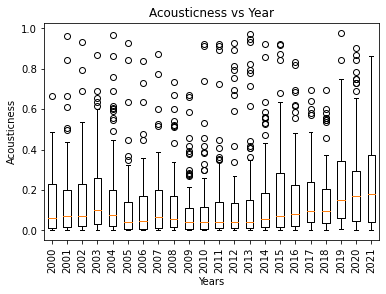

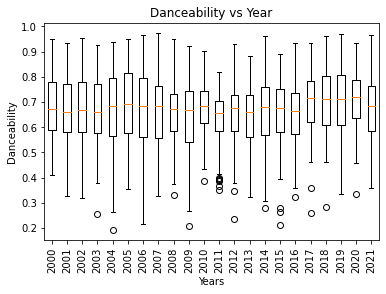

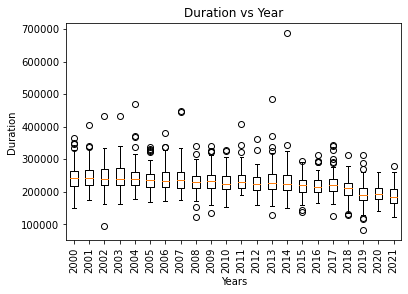

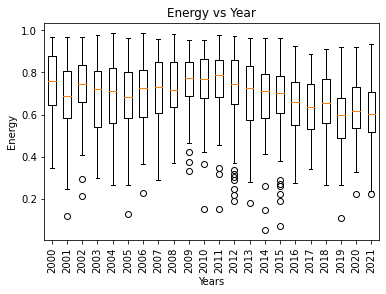

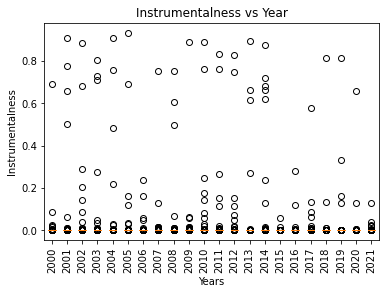

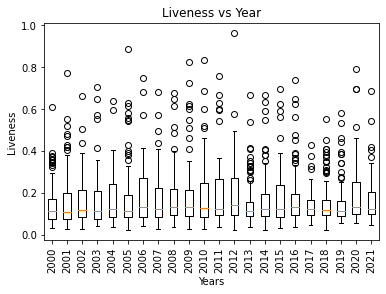

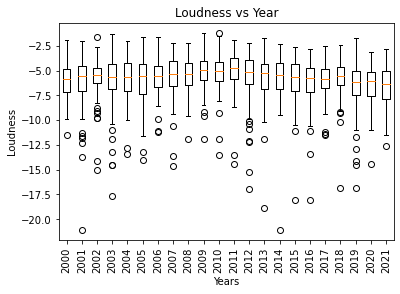

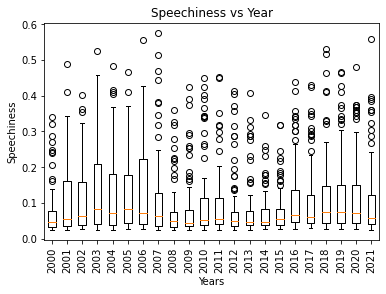

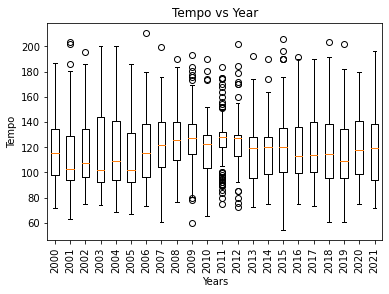

In [110]:
#creation of boxplot
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    
    AcousticnessBoxplot=pd.DataFrame({"2000":Year2000.reset_index()[Audio],
                                    "2001":Year2001.reset_index()[Audio],
                                    "2002":Year2002.reset_index()[Audio],
                                    "2003":Year2003.reset_index()[Audio],
                                    "2004":Year2004.reset_index()[Audio],
                                    "2005":Year2005.reset_index()[Audio],
                                    "2006":Year2006.reset_index()[Audio],
                                    "2007":Year2007.reset_index()[Audio],
                                    "2008":Year2008.reset_index()[Audio],
                                    "2009":Year2009.reset_index()[Audio],
                                    "2010":Year2010.reset_index()[Audio],
                                    "2011":Year2011.reset_index()[Audio],
                                    "2012":Year2012.reset_index()[Audio],
                                    "2013":Year2013.reset_index()[Audio],
                                    "2014":Year2014.reset_index()[Audio],
                                    "2015":Year2015.reset_index()[Audio],
                                    "2016":Year2016.reset_index()[Audio],
                                    "2017":Year2017.reset_index()[Audio],
                                    "2018":Year2018.reset_index()[Audio],
                                    "2019":Year2019.reset_index()[Audio],
                                    "2020":Year2020.reset_index()[Audio],
                                    "2021":Year2021.reset_index()[Audio]})
    AcousticnessBoxplot.dropna(how="any",inplace=True)
    fig, ax = plt.subplots()
    ax.boxplot(AcousticnessBoxplot,labels=list(range(2000,2022)),meanline=True)
    ax.set_title(f"{Audio} vs Year")
    ax.set_xlabel("Years")
    ax.set_ylabel(f"{Audio}")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.savefig(f'Figures/YearbyYearBoxplots/{Audio}Boxplots.png')
    plt.close()

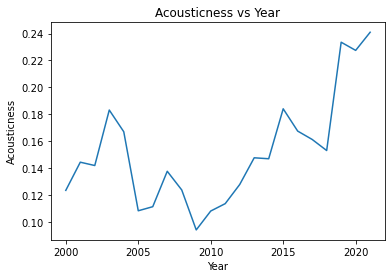

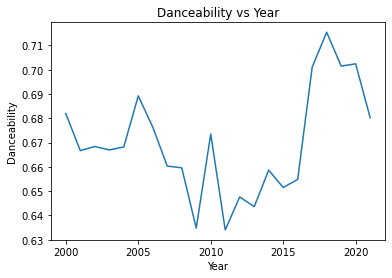

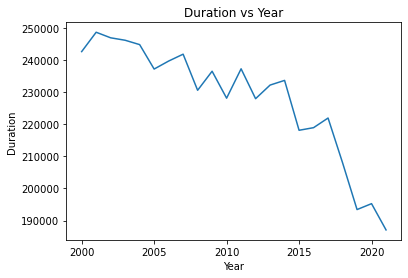

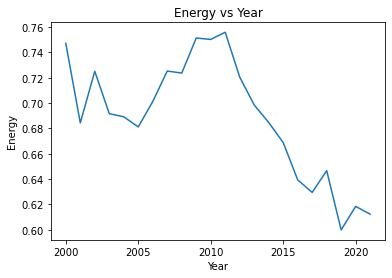

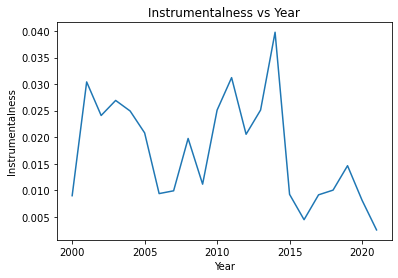

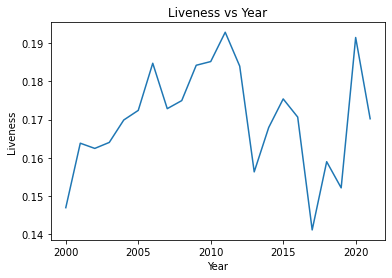

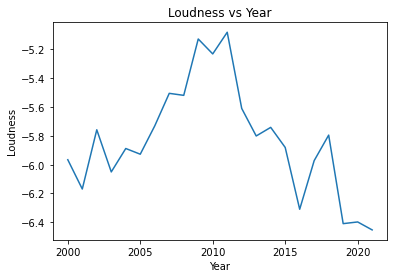

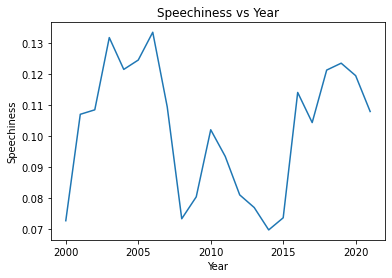

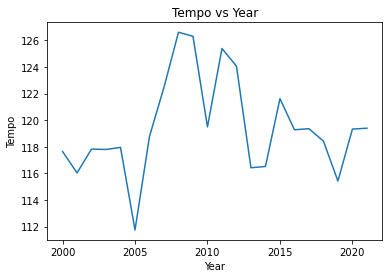

In [111]:
#creation of plot
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    Mean[Audio].T.plot()
    plt.title(f"{Audio} vs Year")
    plt.xlabel("Year")
    plt.ylabel(f"{Audio}")
    plt.savefig(f'Figures/YearbyYearPlots/{Audio}Plots.png')
    plt.show()
    plt.close()

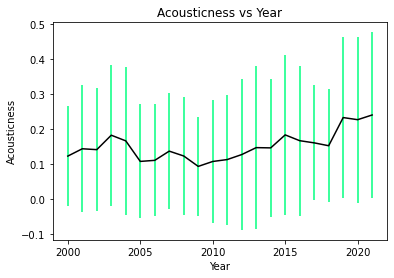

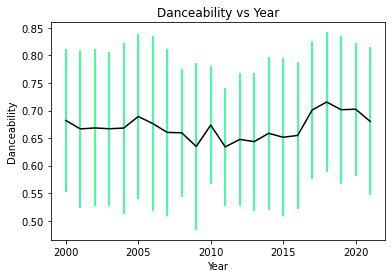

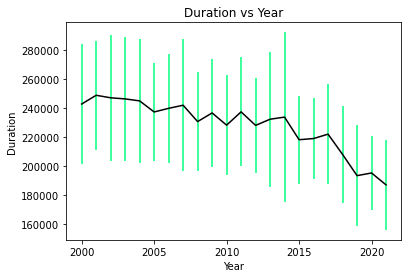

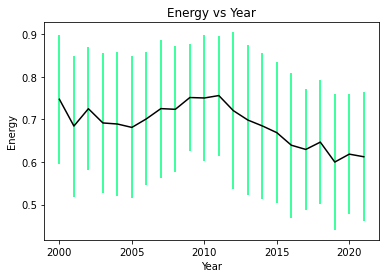

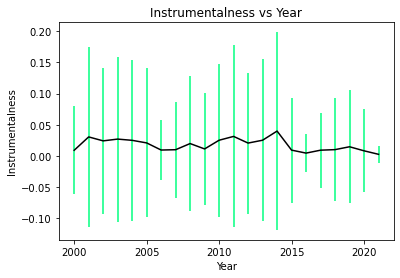

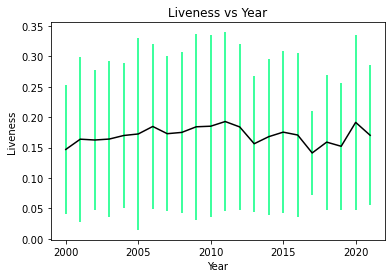

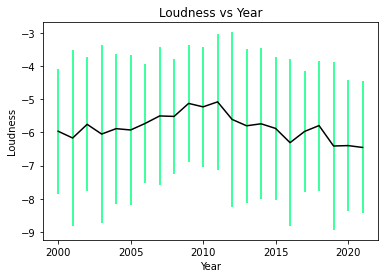

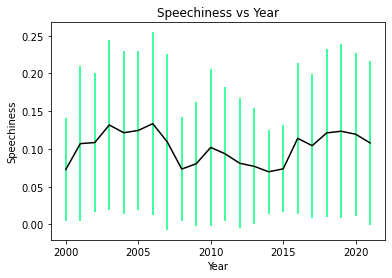

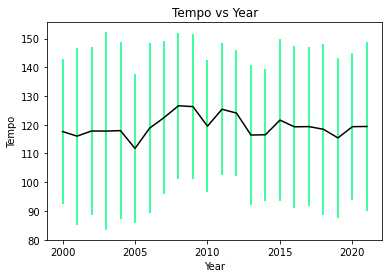

In [112]:
#creation of errorbar
AudioColumns=AllYears.columns[7:16]
mean_std=AllYears[["Year","Duration"]].groupby("Year").agg(["mean","std"])

for Audio in AudioColumns:
    mean_std=AllYears[["Year",Audio]].groupby("Year").agg(["mean","std"])
    plt.errorbar(mean_std.index,mean_std[Audio]["mean"],yerr=mean_std[Audio]["std"],ecolor="springgreen",color="black")
    plt.title(f"{Audio} vs Year")
    plt.xlabel("Year")
    plt.ylabel(f"{Audio}")
    plt.savefig(f'Figures/YearbyYearErrorbar/{Audio}ErrorBar.png')
    plt.show()
    plt.close()

In [113]:
#outputting the data used for the errorbar
GroupedData=AllYears[['Year','Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo']].groupby("Year").agg(["mean","std"])

AudioColumns=['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo']

for Audio in AudioColumns:
    tempdf=GroupedData[Audio]
    tempdf.rename(columns={"mean":"Mean",
                          "std":"Standard Deviation"},inplace=True)
    tempdf["Mean"]=tempdf["Mean"].map("{:.3f}".format)
    tempdf["Standard Deviation"]=tempdf["Standard Deviation"].map("{:.3f}".format)

    tempdf.to_csv(f"Figures/ErrorBarData/{Audio}Grouped.csv",header=True,index=True)

/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [114]:
#outputting results
for i in range(len(AudioColumns)):
    print(f"{AudioColumns[i]} p-value: {pvalues[i][1]}", file=open("Figures/p-values.txt", "a"))

# Artist Analysis


In [116]:
# Read songs.csv file
artist_data = pd.read_csv("Resources/artist_data.csv")

In [117]:
artist_data

,Position,Artist,Genre,Lead Streams,Featured streams,Tracks,1b,100m,10m,1m,Update,% Songs Streamed 1Million Times,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058","17,624,649,510",248.0,6,117,241,244,11.04.22,98%,97%,47%,2%
1,2,Ed Sheeran,Pop,"35,009,165,977","2,537,534,050",222.0,10,59,166,200,11.04.22,90%,75%,27%,5%
2,3,Bad Bunny,Latin Trap,"33,838,992,346","4,440,723,306",141.0,3,89,134,140,11.04.22,99%,95%,63%,2%
3,4,The Weeknd,R&B/Soul,"30,759,273,612","3,858,847,246",178.0,6,69,143,161,11.04.22,90%,80%,39%,3%
4,5,Ariana Grande,Pop,"30,199,885,343","1,934,573,510",181.0,5,69,126,175,11.04.22,97%,70%,38%,3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Upchurch,NaN,"1,233,720,207","136,998,161",225.0,0,0,29,177,03.03.22,79%,13%,0%,0%
996,997,Hungria Hip Hop,NaN,"1,233,176,813","69,096,039",63.0,0,1,37,59,04.12.21,94%,59%,2%,0%
997,998,Chicago,NaN,"1,232,497,152",5,725.0,0,4,11,56,22.03.22,8%,2%,1%,0%
998,999,Riton,NaN,"1,231,385,490","21,351,886",118.0,0,3,8,24,01.03.22,20%,7%,3%,0%


In [118]:
# print colummns list 
print(artist_data.columns)

Index(['Position', 'Artist', 'Genre', 'Lead Streams', 'Featured streams',
       'Tracks', '1b', '100m', '10m', '1m', 'Update',
       '% Songs Streamed 1Million Times', '% Songs Streamed 10Million Times',
       '% Songs Streamed 100Million Times', '% Songs Streamed 1Billion Times'],
      dtype='object')


In [119]:
# convert to dataframe
artist_df = pd.DataFrame(artist_data)

In [120]:
# Show df
artist_df

,Position,Artist,Genre,Lead Streams,Featured streams,Tracks,1b,100m,10m,1m,Update,% Songs Streamed 1Million Times,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058","17,624,649,510",248.0,6,117,241,244,11.04.22,98%,97%,47%,2%
1,2,Ed Sheeran,Pop,"35,009,165,977","2,537,534,050",222.0,10,59,166,200,11.04.22,90%,75%,27%,5%
2,3,Bad Bunny,Latin Trap,"33,838,992,346","4,440,723,306",141.0,3,89,134,140,11.04.22,99%,95%,63%,2%
3,4,The Weeknd,R&B/Soul,"30,759,273,612","3,858,847,246",178.0,6,69,143,161,11.04.22,90%,80%,39%,3%
4,5,Ariana Grande,Pop,"30,199,885,343","1,934,573,510",181.0,5,69,126,175,11.04.22,97%,70%,38%,3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Upchurch,NaN,"1,233,720,207","136,998,161",225.0,0,0,29,177,03.03.22,79%,13%,0%,0%
996,997,Hungria Hip Hop,NaN,"1,233,176,813","69,096,039",63.0,0,1,37,59,04.12.21,94%,59%,2%,0%
997,998,Chicago,NaN,"1,232,497,152",5,725.0,0,4,11,56,22.03.22,8%,2%,1%,0%
998,999,Riton,NaN,"1,231,385,490","21,351,886",118.0,0,3,8,24,01.03.22,20%,7%,3%,0%


In [121]:
artist_df.describe()

,Position,Tracks,1b,100m,10m,1m
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,185.574921,0.289000,8.133000,44.56600,115.270000
std,288.819436,164.501797,0.917781,10.380417,30.87528,72.643087
min,1.000000,1.028000,0.000000,0.000000,0.00000,10.000000
25%,250.750000,81.000000,0.000000,3.000000,24.00000,66.750000
50%,500.500000,138.000000,0.000000,5.000000,36.00000,97.000000
75%,750.250000,233.000000,0.000000,9.000000,56.00000,145.000000
max,1000.000000,979.000000,10.000000,117.000000,246.00000,606.000000


In [122]:
# Mean No. of tracks = 186, 
# SD = 164.50, 
# Max No.of tracks = 979,
# Min No. of tracks = 1.03    *** need to clean data as cannot have floats****
# Median 1st quartile = 81,
# Median 2nd quartile = 138,
# Median 3rd quartile = 233



# Data cleanup remove rows with errors - Tracks as floats convert to integers

In [123]:
s = artist_df['Tracks']
artist_df['Tracks'] = artist_df['Tracks'].astype(int)

artist_df = artist_df[artist_df['Tracks'] == s]
print(artist_df)

     Position           Artist       Genre    Lead Streams Featured streams  \
0           1            Drake     Hip-Hop  45,930,207,058   17,624,649,510   
1           2       Ed Sheeran         Pop  35,009,165,977    2,537,534,050   
2           3        Bad Bunny  Latin Trap  33,838,992,346    4,440,723,306   
3           4       The Weeknd    R&B/Soul  30,759,273,612    3,858,847,246   
4           5    Ariana Grande         Pop  30,199,885,343    1,934,573,510   
..        ...              ...         ...             ...              ...   
995       996         Upchurch         NaN   1,233,720,207      136,998,161   
996       997  Hungria Hip Hop         NaN   1,233,176,813       69,096,039   
997       998          Chicago         NaN   1,232,497,152                5   
998       999            Riton         NaN   1,231,385,490       21,351,886   
999      1000          BIGBANG         NaN   1,231,303,296                1   

     Tracks  1b  100m  10m   1m    Update % Songs S

In [124]:
artist_df.head()

,Position,Artist,Genre,Lead Streams,Featured streams,Tracks,1b,100m,10m,1m,Update,% Songs Streamed 1Million Times,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058","17,624,649,510",248,6,117,241,244,11.04.22,98%,97%,47%,2%
1,2,Ed Sheeran,Pop,"35,009,165,977","2,537,534,050",222,10,59,166,200,11.04.22,90%,75%,27%,5%
2,3,Bad Bunny,Latin Trap,"33,838,992,346","4,440,723,306",141,3,89,134,140,11.04.22,99%,95%,63%,2%
3,4,The Weeknd,R&B/Soul,"30,759,273,612","3,858,847,246",178,6,69,143,161,11.04.22,90%,80%,39%,3%
4,5,Ariana Grande,Pop,"30,199,885,343","1,934,573,510",181,5,69,126,175,11.04.22,97%,70%,38%,3%


In [125]:
artist_df.describe()

,Position,Tracks,1b,100m,10m,1m
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,498.747942,190.829218,0.296296,8.254115,44.858025,111.655350
std,289.075392,163.871492,0.929362,10.479652,30.977125,66.762098
min,1.000000,11.000000,0.000000,0.000000,2.000000,10.000000
25%,248.750000,84.750000,0.000000,3.000000,24.000000,66.000000
50%,499.500000,139.000000,0.000000,5.000000,37.000000,96.000000
75%,748.250000,235.000000,0.000000,10.000000,56.000000,141.000000
max,1000.000000,979.000000,10.000000,117.000000,246.000000,606.000000


In [126]:
# Mean No. of tracks = 191, 
# SD = 164.87, 
# Max No.of tracks = 979,
# Min No. of tracks = 11    
# Median 1st quartile = 85,
# Median 2nd quartile = 139,
# Median 3rd quartile = 235

# Remove % symbol to clean up data frame for analysis later

In [127]:
# Remove % symbol to clean up data frame for analysis later

cols_to_check = ['% Songs Streamed 1Million Times', '% Songs Streamed 10Million Times', '% Songs Streamed 100Million Times', '% Songs Streamed 1Billion Times']
print(artist_df[cols_to_check])
 
artist_df[cols_to_check] = artist_df[cols_to_check].replace({'%': ''}, regex=True)
print(artist_df)

    % Songs Streamed 1Million Times % Songs Streamed 10Million Times  \
0                               98%                              97%   
1                               90%                              75%   
2                               99%                              95%   
3                               90%                              80%   
4                               97%                              70%   
..                              ...                              ...   
995                             79%                              13%   
996                             94%                              59%   
997                              8%                               2%   
998                             20%                               7%   
999                             16%                               6%   

    % Songs Streamed 100Million Times % Songs Streamed 1Billion Times  
0                                 47%                          

/Users/jovansandhu/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [128]:
# Check if % has been removed
artist_df.head(10)

,Position,Artist,Genre,Lead Streams,Featured streams,Tracks,1b,100m,10m,1m,Update,% Songs Streamed 1Million Times,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058","17,624,649,510",248,6,117,241,244,11.04.22,98,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977","2,537,534,050",222,10,59,166,200,11.04.22,90,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346","4,440,723,306",141,3,89,134,140,11.04.22,99,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612","3,858,847,246",178,6,69,143,161,11.04.22,90,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343","1,934,573,510",181,5,69,126,175,11.04.22,97,70,38,3
5,6,Justin Bieber,Pop,"29,483,883,662","10,391,249,275",222,6,55,169,194,11.04.22,87,76,25,3
6,7,Taylor Swift,Country,"27,839,517,025","386,434,032",319,1,76,246,309,11.04.22,97,77,24,0
7,8,Eminem,Hip-Hop,"27,803,863,084","3,899,986,002",279,3,60,222,259,11.04.22,93,80,22,1
8,9,Post Malone,Hip-Hop,"27,472,535,195","2,285,274,498",82,8,54,65,66,11.04.22,80,79,66,10
9,10,BTS,K-Pop,"24,789,404,457","190,636,034",253,1,88,200,253,11.04.22,100,79,35,0


In [129]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Position                           972 non-null    int64 
 1   Artist                             972 non-null    object
 2   Genre                              99 non-null     object
 3   Lead Streams                       972 non-null    object
 4   Featured streams                   972 non-null    object
 5   Tracks                             972 non-null    int64 
 6   1b                                 972 non-null    int64 
 7   100m                               972 non-null    int64 
 8   10m                                972 non-null    int64 
 9   1m                                 972 non-null    int64 
 10  Update                             972 non-null    object
 11  % Songs Streamed 1Million Times    972 non-null    object
 12  % Songs 

In [130]:
# Remove non essential rows - 'Featured Streams' and 'update' 
artist_df_cleaned = artist_df.drop(columns=["Featured streams","Update", "% Songs Streamed 1Million Times", "1m"])
artist_df_cleaned.head()

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3


In [131]:
# Total number of 1M songs streamed calculated for use later on
total_1M = artist_df.iloc[:10]
Total_1M = total_1M["1m"].sum()
Total_1M

2001

## Start of data analysis

# How many songs did they make on average?

In [132]:
# Total number of tracks from 1000 artists and average number of tracks per artist.

Total_Tracks = artist_df_cleaned["Tracks"].sum()
artist_count = artist_df_cleaned["Tracks"].count()
Total_number_of_Artists = str(artist_count)
#print(Total_number_of_Artists)

print(f"The Total number of Tracks in the top 1000 artist playlist are: {Total_Tracks}")
print(f"The Average number of Tracks per artist: { round(Total_Tracks / artist_count) }")



The Total number of Tracks in the top 1000 artist playlist are: 185486
The Average number of Tracks per artist: 191


In [133]:
# rename columns

artist_df_cleaned.rename(columns = {
    '1b':'1 Billion', 
    '100m':'100 Million', 
    '10m':'10 Million',
})

,Position,Artist,Genre,Lead Streams,Tracks,1 Billion,100 Million,10 Million,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Upchurch,NaN,"1,233,720,207",225,0,0,29,13,0,0
996,997,Hungria Hip Hop,NaN,"1,233,176,813",63,0,1,37,59,2,0
997,998,Chicago,NaN,"1,232,497,152",725,0,4,11,2,1,0
998,999,Riton,NaN,"1,231,385,490",118,0,3,8,7,3,0


In [134]:
artist_df_cleaned.head()


,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3


In [135]:
artist_df_cleaned.dtypes
#artist_df_cleaned["% Songs Streamed 10Million Times"]astype.

Position                              int64
Artist                               object
Genre                                object
Lead Streams                         object
Tracks                                int64
1b                                    int64
100m                                  int64
10m                                   int64
% Songs Streamed 10Million Times     object
% Songs Streamed 100Million Times    object
% Songs Streamed 1Billion Times      object
dtype: object

In [136]:
artist_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Position                           972 non-null    int64 
 1   Artist                             972 non-null    object
 2   Genre                              99 non-null     object
 3   Lead Streams                       972 non-null    object
 4   Tracks                             972 non-null    int64 
 5   1b                                 972 non-null    int64 
 6   100m                               972 non-null    int64 
 7   10m                                972 non-null    int64 
 8   % Songs Streamed 10Million Times   972 non-null    object
 9   % Songs Streamed 100Million Times  972 non-null    object
 10  % Songs Streamed 1Billion Times    972 non-null    object
dtypes: int64(5), object(6)
memory usage: 91.1+ KB


In [137]:
artist_df_cleaned["% Songs Streamed 100Million Times"] = artist_df_cleaned['% Songs Streamed 100Million Times'].astype('int')
artist_df_cleaned.dtypes

Position                              int64
Artist                               object
Genre                                object
Lead Streams                         object
Tracks                                int64
1b                                    int64
100m                                  int64
10m                                   int64
% Songs Streamed 10Million Times     object
% Songs Streamed 100Million Times     int64
% Songs Streamed 1Billion Times      object
dtype: object

In [138]:
artist_df_cleaned["% Songs Streamed 10Million Times"] = artist_df_cleaned['% Songs Streamed 10Million Times'].astype('int')
artist_df_cleaned.dtypes

Position                              int64
Artist                               object
Genre                                object
Lead Streams                         object
Tracks                                int64
1b                                    int64
100m                                  int64
10m                                   int64
% Songs Streamed 10Million Times      int64
% Songs Streamed 100Million Times     int64
% Songs Streamed 1Billion Times      object
dtype: object

In [139]:
artist_df_cleaned["% Songs Streamed 1Billion Times"] = artist_df_cleaned['% Songs Streamed 1Billion Times'].astype('int')
artist_df_cleaned.dtypes



Position                              int64
Artist                               object
Genre                                object
Lead Streams                         object
Tracks                                int64
1b                                    int64
100m                                  int64
10m                                   int64
% Songs Streamed 10Million Times      int64
% Songs Streamed 100Million Times     int64
% Songs Streamed 1Billion Times       int64
dtype: object

# How many of them became popular?


# To find artist total tracks streamed 10 Million times greater than 80%




In [140]:
Streams_10M_df = pd.DataFrame(artist_df_cleaned.loc[artist_df_cleaned['% Songs Streamed 10Million Times']>80,:])
Streams_10M_df

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
12,13,Billie Eilish,Alternative/Indie pop,"21,436,789,653",62,4,41,57,92,66,6
13,14,Juice WRLD,Hip-Hop,"21,084,148,801",117,2,57,112,96,49,2
30,31,Kendrick Lamar,Hip-Hop,"15,193,196,132",103,1,32,91,88,31,1
32,33,One Direction,Pop,"14,224,545,475",124,0,42,100,81,34,0
42,43,Adele,Pop Soul,"12,995,508,731",70,3,24,59,84,34,4
46,47,Twenty One Pilots,Alternative Rock,"12,230,092,784",90,3,34,74,82,38,3
48,49,Lil Uzi Vert,Hip-Hop,"11,981,431,319",129,1,30,117,91,23,1
50,51,Kygo,Electronic dance,"11,824,039,530",102,1,28,85,83,27,1


In [141]:
data_10M = Streams_10M_df[["Artist","% Songs Streamed 10Million Times"]]
Sum_Streams_10M_df = Streams_10M_df["10m"].sum()
print(f"The Number of Artists with the majority of their Tracks (80%) streaming 10 Million Times is: {len(data_10M)}")
print("--------------------------------------------------------------")
print(f"The Sum of All the tracks Artist streams over 10 Million: {round(Sum_Streams_10M_df)}")
print("--------------------------------------------------------------")
print(f"The Average Number of Tracks streaming 10 Million times is : {round(Sum_Streams_10M_df/44)}%")

The Number of Artists with the majority of their Tracks (80%) streaming 10 Million Times is: 44
--------------------------------------------------------------
The Sum of All the tracks Artist streams over 10 Million: 2515
--------------------------------------------------------------
The Average Number of Tracks streaming 10 Million times is : 57%


In [142]:
data_10M = Streams_10M_df[["Artist","% Songs Streamed 10Million Times"]]

print(f"The Number of Artists with the majority of their Tracks (80%) streaming 100 Million Times is : {len(data_10M)}")

The Number of Artists with the majority of their Tracks (80%) streaming 100 Million Times is : 44


In [143]:
Artist_names_10M = data_10M["Artist"].unique

# Bar chart for percentages of popular songs

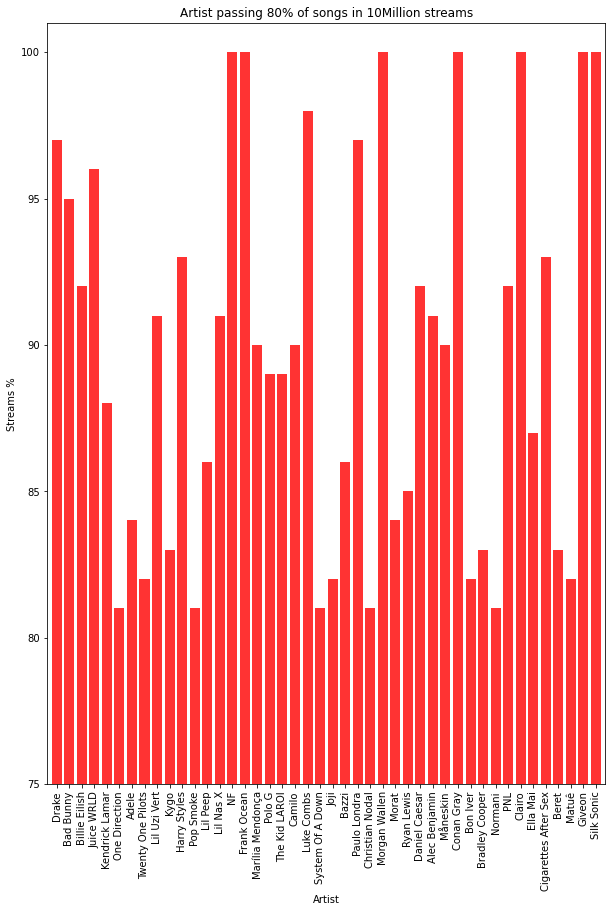

In [188]:
Artist_names_10M = data_10M["Artist"].unique
x_axis = Streams_10M_df["Artist"]
streams = Streams_10M_df["% Songs Streamed 10Million Times"]
fig1, ax1 = plt.subplots(figsize=(10,14))

plt.bar(x_axis,streams, color='red', alpha=0.8, align='center')

plt.xticks( rotation='vertical')

plt.title("Artist passing 80% of songs in 10Million streams")
plt.xlabel("Artist")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(75, 101)
plt.ylabel("Streams %")
plt.savefig("Figures/Project1_BarChart1.png")

In [145]:
Streams_100M_df = pd.DataFrame(artist_df_cleaned.loc[artist_df_cleaned['% Songs Streamed 100Million Times']>35,:])
Streams_100M_df

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
8,9,Post Malone,Hip-Hop,"27,472,535,195",82,8,54,65,79,66,10
12,13,Billie Eilish,Alternative/Indie pop,"21,436,789,653",62,4,41,57,92,66,6
13,14,Juice WRLD,Hip-Hop,"21,084,148,801",117,2,57,112,96,49,2
20,21,Travis Scott,Hip-Hop,"19,184,512,661",112,3,43,90,80,38,3
25,26,Bruno Mars,Electronic dance,"16,495,189,532",79,5,31,61,77,39,6
46,47,Twenty One Pilots,Alternative Rock,"12,230,092,784",90,3,34,74,82,38,3


In [146]:
data_100M = Streams_100M_df[["Artist","% Songs Streamed 100Million Times"]]
Sum_Streams_100M_df = Streams_100M_df["100m"].sum()
print(f"From the top 100 Artist the Number of Artists streaming over 34% of their track 100 Million times is : {len(data_100M)}")
print("--------------------------------------------------------------")
print(f"The Sum of All Artist streams over 100 Million: {Sum_Streams_100M_df}")
print("--------------------------------------------------------------")
print(f"The Average Number of Tracks streaming 100 Million times is : {round(Sum_Streams_100M_df/16)}")

From the top 100 Artist the Number of Artists streaming over 34% of their track 100 Million times is : 16
--------------------------------------------------------------
The Sum of All Artist streams over 100 Million: 723
--------------------------------------------------------------
The Average Number of Tracks streaming 100 Million times is : 45


In [147]:
data_100M = Streams_100M_df[["Artist","% Songs Streamed 100Million Times"]]

print(f"The Number of Artists at least 35% of thier tracks 100 Million Times is : {len(data_100M)}")

The Number of Artists at least 35% of thier tracks 100 Million Times is : 16


In [148]:
data_100M["Artist"].unique

<bound method Series.unique of 0                  Drake
2              Bad Bunny
3             The Weeknd
4          Ariana Grande
8            Post Malone
12         Billie Eilish
13            Juice WRLD
20          Travis Scott
25            Bruno Mars
46     Twenty One Pilots
55        Camila Cabello
66          Harry Styles
115          Frank Ocean
133                  SZA
167               Camilo
214         Paulo Londra
Name: Artist, dtype: object>

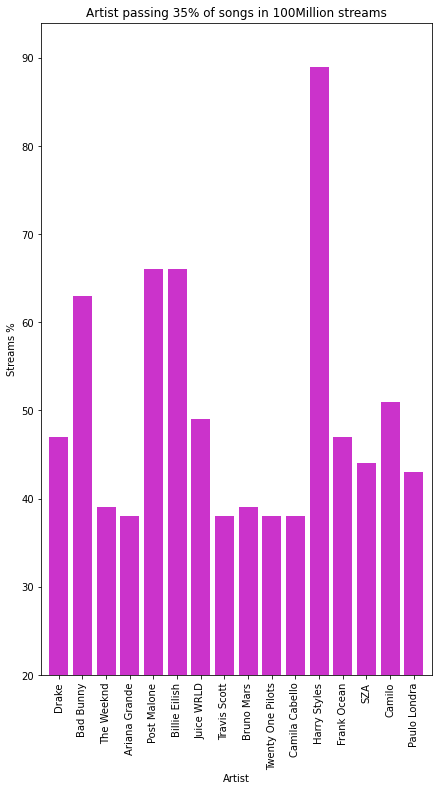

In [189]:
#created list of Artist for x axis using unique function

x_axis = Streams_100M_df["Artist"]
streams = Streams_100M_df["% Songs Streamed 100Million Times"]
fig1, ax1 = plt.subplots(figsize=(7, 12))


plt.bar(x_axis,streams, facecolor="m", alpha=0.8, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Drake','Bad Bunny', 'The Weeknd', 'Ariana Grande', 'Post Malone', 'Billie Eilish', 'Juice WRLD', 'Travis Scott', 'Bruno Mars', 'Twenty One Pilots', 'Camila Cabello', 'Harry Styles', 'Frank Ocean', 'SZA', 'Camilo', 'Paulo Londra'],  rotation='vertical')

plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(20, 94)
plt.title("Artist passing 35% of songs in 100Million streams")
plt.xlabel("Artist")
plt.ylabel("Streams %")
plt.savefig("Figures/Project1_BarChart2.png")

In [150]:
Streams_1B = pd.DataFrame(artist_df_cleaned.loc[artist_df_cleaned['% Songs Streamed 1Billion Times']>1,:])
Streams_1B

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
...,...,...,...,...,...,...,...,...,...,...,...
712,713,Dynoro,NaN,"1,704,509,405",17,1,3,9,53,18,6
721,722,Trevor Daniel,NaN,"1,684,760,342",48,1,2,12,25,4,2
748,749,beabadoobee,NaN,"1,641,802,433",59,1,1,9,15,2,2
762,763,Powfu,NaN,"1,617,907,608",66,1,1,12,18,2,2


In [151]:
Streams_1B_df = pd.DataFrame(artist_df_cleaned.loc[artist_df_cleaned['% Songs Streamed 1Billion Times']>2,:])
Streams_1B_df

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
5,6,Justin Bieber,Pop,"29,483,883,662",222,6,55,169,76,25,3
8,9,Post Malone,Hip-Hop,"27,472,535,195",82,8,54,65,79,66,10
12,13,Billie Eilish,Alternative/Indie pop,"21,436,789,653",62,4,41,57,92,66,6
15,16,XXXTENTACION,Hip-Hop,"19,953,049,106",131,7,42,104,79,32,5
17,18,Khalid,R&B/Soul,"19,690,052,960",111,7,39,86,77,35,6
18,19,Dua Lipa,Pop,"19,665,995,562",193,6,33,80,41,17,3
19,20,Imagine Dragons,Alternative/Indie pop,"19,596,416,938",146,4,39,108,74,27,3


In [152]:
Streams_1B_df["1b"].sum()

119

In [153]:
data_1B = Streams_1B_df[["Artist","% Songs Streamed 1Billion Times"]]
Sum_Streams_1B_df = Streams_1B_df["1b"].sum()
print(f"The Number of Artists streaming over 2 Billion times is : {len(data_1B)}")
print("--------------------------------------------------------------")
#print (f"The total Artists streaming over 2 Billion times is : {(sum_data_1B.max()}")
print("--------------------------------------------------------------")
print(f"The Sum of All Artist streaming over 2 Billion:{Sum_Streams_1B_df}")
print("--------------------------------------------------------------")
print(f"The Average Number of Artists streaming over 2 Billion times is : {round(Sum_Streams_1B_df/35)}%")



The Number of Artists streaming over 2 Billion times is : 35
--------------------------------------------------------------
--------------------------------------------------------------
The Sum of All Artist streaming over 2 Billion:119
--------------------------------------------------------------
The Average Number of Artists streaming over 2 Billion times is : 3%


In [154]:
data_1B["Artist"].unique

<bound method Series.unique of 1             Ed Sheeran
3             The Weeknd
4          Ariana Grande
5          Justin Bieber
8            Post Malone
12         Billie Eilish
15          XXXTENTACION
17                Khalid
18              Dua Lipa
19       Imagine Dragons
20          Travis Scott
23          Shawn Mendes
25            Bruno Mars
28             Sam Smith
42                 Adele
46     Twenty One Pilots
47            Marshmello
55        Camila Cabello
66          Harry Styles
73          Charlie Puth
74               Cardi B
94             Lil Nas X
101                 ZAYN
107       Olivia Rodrigo
131        Lewis Capaldi
218     Hailee Steinfeld
286           Ryan Lewis
308          Tones And I
338         benny blanco
375        Alec Benjamin
394           Dean Lewis
438       Bradley Cooper
514                 DNCE
619       Arizona Zervas
712               Dynoro
Name: Artist, dtype: object>

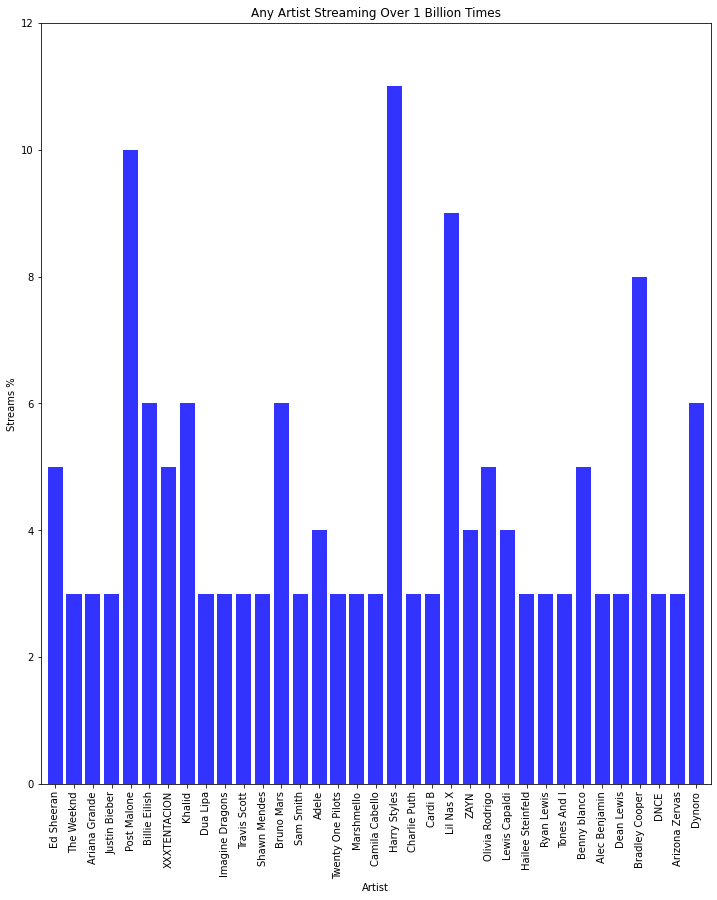

<Figure size 432x288 with 0 Axes>

In [190]:
x_axis = Streams_1B_df["Artist"]
streams = Streams_1B_df["% Songs Streamed 1Billion Times"]
fig1, ax1 = plt.subplots(figsize=(12,14))


plt.bar(x_axis,streams, facecolor="b", alpha=0.8, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ed Sheeran', 'The Weeknd', 'Ariana Grande', 'Justin Bieber', 'Post Malone', 'Billie Eilish', 'XXXTENTACION', 'Khalid',
'Dua Lipa', 'Imagine Dragons', 'Travis Scott', 'Shawn Mendes', 'Bruno Mars', 'Sam Smith', 'Adele', 'Twenty One Pilots', 'Marshmello', 
'Camila Cabello', 'Harry Styles', 'Charlie Puth', 'Cardi B', 'Lil Nas X', 'ZAYN', 'Olivia Rodrigo', 'Lewis Capaldi', 'Hailee Steinfeld', 
'Ryan Lewis', 'Tones And I', 'Benny blanco', 'Alec Benjamin', 'Dean Lewis', 'Bradley Cooper', 'DNCE', 'Arizona Zervas', 'Dynoro'],  rotation='vertical')


plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 12)
plt.title("Any Artist Streaming Over 1 Billion Times")
plt.xlabel("Artist")
plt.ylabel("Streams %")

plt.show()
plt.savefig("Figures/Project1_BarChart3.png")

# Is there a difference with the top 10?


# Top 1000 artist analysis

In [156]:
artist_df_cleaned.head()

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3


In [157]:
# Artist with the greatset number of tracks released
Total_Tracks = artist_df_cleaned["Tracks"].sum()
Max_Tracks = artist_df_cleaned["Tracks"].max()

# Artist with the least number of tracks released
Min_Tracks = artist_df_cleaned["Tracks"].min()
print(f"The total number of tracks in the top 1000 artist are :{Total_Tracks}")
print(f"In the artist charts the maximum number of tracks released by an artist was :{Max_Tracks} and the least number of tracks released was {Min_Tracks}")

The total number of tracks in the top 1000 artist are :185486
In the artist charts the maximum number of tracks released by an artist was :979 and the least number of tracks released was 11


In [158]:
Min_10m = artist_df_cleaned["10m"].min()
Max_10m = artist_df_cleaned["10m"].max()

Min_100m = artist_df_cleaned["100m"].min()
Max_100m = artist_df_cleaned["100m"].max()

Min_1b = artist_df_cleaned["1b"].min()
Max_1b = artist_df_cleaned["1b"].max()

In [159]:
print(f"In the Top 1000 artist, the minimum streams reaching 10 Million are {Min_10m} and maximum are {Max_10m}")
print("----------------------------------------------------------------------------")
print(f"In the Top 1000 artist, the minimum streams reaching 100 Million are {Min_100m} and maximum are {Max_100m}")
print("----------------------------------------------------------------------------")
print(f"In the Top 1000 artist, the minimum streams reaching 1 Billion are {Min_1b} and maximum are {Max_1b}")



In the Top 1000 artist, the minimum streams reaching 10 Million are 2 and maximum are 246
----------------------------------------------------------------------------
In the Top 1000 artist, the minimum streams reaching 100 Million are 0 and maximum are 117
----------------------------------------------------------------------------
In the Top 1000 artist, the minimum streams reaching 1 Billion are 0 and maximum are 10


# Top 100 artist analysis

In [180]:
Top_100_artist = artist_df_cleaned.iloc[:100]
Top_100_artist

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Tyga,Hip-Hop,"7,707,589,449",297,1,19,99,33,6,0
96,97,P!nk,Pop,"7,705,620,044",234,0,21,82,35,9,0
97,98,John Mayer,Rock,"7,690,841,443",197,0,18,117,59,9,0
98,99,Alan Walker,Electro Pop,"7,686,431,970",151,1,16,64,42,11,1


In [182]:
Top_100_artist.dtypes

Position                              int64
Artist                               object
Genre                                object
Lead Streams                         object
Tracks                                int64
1b                                    int64
100m                                  int64
10m                                   int64
% Songs Streamed 10Million Times      int64
% Songs Streamed 100Million Times     int64
% Songs Streamed 1Billion Times       int64
dtype: object

In [186]:
Total_Tracks_top_100 = Top_100_artist["Tracks"].sum()
Total_10m_top_100 = Top_100_artist["10m"].sum()
Total_100m_top_100 = (Top_100_artist["100m"]).sum()
Total_1b_top_100 = Top_100_artist["1b"].sum()

print(f"The Total tracks in top 100 artist is: {Total_Tracks_top_100}")
print("--------------------------------------------------------------")
print(f"The Total tracks streamed 10 Million times in top 100 artist is: {round(Total_10m_top_100)}")
print("--------------------------------------------------------------")
print(f"The Total tracks streamed 100 Million times in top 100 artist is: {Total_100m_top_100}")
print("--------------------------------------------------------------")
print(f"The Total tracks streamed 1 Billion times in top 100 artist is: {Total_1b_top_100}")

The Total tracks in top 100 artist is: 21793
--------------------------------------------------------------
The Total tracks streamed 10 Million times in top 100 artist is: 10388
--------------------------------------------------------------
The Total tracks streamed 100 Million times in top 100 artist is: 3139
--------------------------------------------------------------
The Total tracks streamed 1 Billion times in top 100 artist is: 186


In [183]:
Min_Tracks = Top_100_artist["Tracks"].min()
Max_Tracks = Top_100_artist["Tracks"].max()

print(f"The minimum number of tracks relseased by an artist in the top 100 artist is :{Min_Tracks}")
print(f"The maximum number of tracks relseased by an artist in the top 100 artist is :{Max_Tracks}")

The minimum number of tracks relseased by an artist in the top 100 artist is :27
The maximum number of tracks relseased by an artist in the top 100 artist is :814


In [184]:
avg_top_100_10M = np.mean(Top_100_artist["10m"])
avg_top_100_100M = np.mean(Top_100_artist["100m"])
avg_top_100_1B = np.mean(Top_100_artist["1b"])

print(f"The average number of 10 Million streams in the top 100 artist are :{round(avg_top_100_10M)} ")
print(f"The average number of 100 Million streams in the top 100 artist are :{round(avg_top_100_100M)} ")
print(f"The average number of 1 Billion streams in the top 100 artist are :{round(avg_top_100_1B)} ")

The average number of 10 Million streams in the top 100 artist are :104 
The average number of 100 Million streams in the top 100 artist are :31 
The average number of 1 Billion streams in the top 100 artist are :2 


# Top 10 artist analysis 

In [164]:
top_10_df = artist_df_cleaned.iloc[:10]
top_10_df

,Position,Artist,Genre,Lead Streams,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
0,1,Drake,Hip-Hop,"45,930,207,058",248,6,117,241,97,47,2
1,2,Ed Sheeran,Pop,"35,009,165,977",222,10,59,166,75,27,5
2,3,Bad Bunny,Latin Trap,"33,838,992,346",141,3,89,134,95,63,2
3,4,The Weeknd,R&B/Soul,"30,759,273,612",178,6,69,143,80,39,3
4,5,Ariana Grande,Pop,"30,199,885,343",181,5,69,126,70,38,3
5,6,Justin Bieber,Pop,"29,483,883,662",222,6,55,169,76,25,3
6,7,Taylor Swift,Country,"27,839,517,025",319,1,76,246,77,24,0
7,8,Eminem,Hip-Hop,"27,803,863,084",279,3,60,222,80,22,1
8,9,Post Malone,Hip-Hop,"27,472,535,195",82,8,54,65,79,66,10
9,10,BTS,K-Pop,"24,789,404,457",253,1,88,200,79,35,0


In [165]:
top_10_df.describe()

,Position,Tracks,1b,100m,10m,% Songs Streamed 10Million Times,% Songs Streamed 100Million Times,% Songs Streamed 1Billion Times
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,212.500000,4.900000,73.600000,171.200000,80.800000,38.600000,2.900000
std,3.02765,69.258373,2.923088,19.732658,57.164091,8.560893,15.770577,2.923088
min,1.00000,82.000000,1.000000,54.000000,65.000000,70.000000,22.000000,0.000000
25%,3.25000,178.750000,3.000000,59.250000,136.250000,76.250000,25.500000,1.250000
50%,5.50000,222.000000,5.500000,69.000000,167.500000,79.000000,36.500000,2.500000
75%,7.75000,251.750000,6.000000,85.000000,216.500000,80.000000,45.000000,3.000000
max,10.00000,319.000000,10.000000,117.000000,246.000000,97.000000,66.000000,10.000000


In [166]:
# Max and Min Artist with 10m 100m and 1b

print(f"The Artist with the most 10 Million streams in the top 10 is: Taylor Swift with 246 tracks.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the least 10 Million streams in the top 10 is: Post Malone with 65 tracks.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the most 100 Million streams in the top 10 is: Drake with 117 tracks.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the least 100 Million streams in the top 10 is: Post Malone with 54 tracks.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the most 1 Billion streams in the top 10 is: Ed Sheeran with 10 tracks.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the least 1 Billion streams in the top 10 is: Taylor Swift & BTS with 1 track.")
print("-----------------------------------------------------------------------------------")


print(f"The Artist with the highest track releases is Taylor Swift with 319.")
print("-----------------------------------------------------------------------------------")
print(f"The Artist with the fewest track releases is Post Malone with 82.")
print("-----------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------")

The Artist with the most 10 Million streams in the top 10 is: Taylor Swift with 246 tracks.
-----------------------------------------------------------------------------------
The Artist with the least 10 Million streams in the top 10 is: Post Malone with 65 tracks.
-----------------------------------------------------------------------------------
The Artist with the most 100 Million streams in the top 10 is: Drake with 117 tracks.
-----------------------------------------------------------------------------------
The Artist with the least 100 Million streams in the top 10 is: Post Malone with 54 tracks.
-----------------------------------------------------------------------------------
The Artist with the most 1 Billion streams in the top 10 is: Ed Sheeran with 10 tracks.
-----------------------------------------------------------------------------------
The Artist with the least 1 Billion streams in the top 10 is: Taylor Swift & BTS with 1 track.
------------------------------------

In [167]:
Top_Ten_Total_Tracks = top_10_df["Tracks"].sum()

# calculate total number of tracks streaming 10 Million
top_10m_total_tracks = top_10_df["10m"].sum()

# calculate total number of tracks streaming 100 Million
top_100m_total_tracks = top_10_df["100m"].sum()

# calculate total number of tracks streaming 1 Billion
top_1b_total_tracks = top_10_df["1b"].sum()

# calculate mean number of tracks streaming 10 Million
avg_top_10m_total_tracks = top_10m_total_tracks/10

# calculate mean number of tracks streaming 100 Million
avg_top_100m_total_tracks = top_100m_total_tracks/10

# calculate mean number of tracks streaming 1 Billion
avg_top_1b_total_tracks = top_1b_total_tracks/10

# Calculate median of 10m
#np.median("Tracks")

print(f" The total number of tracks in the top ten artist are: {Top_Ten_Total_Tracks + Total_1M}")
print("-----------------------------------------------------------------------------")
print(f" The Total number of tracks from the top ten artist reaching 10 Million are: {top_10m_total_tracks}")
print("-----------------------------------------------------------------------------")
print(f" The Total number of tracks from the top ten artist reaching 100 Million are: {top_100m_total_tracks}")
print("-----------------------------------------------------------------------------")
print(f" The Total number of tracks from the top ten artist reaching 1 Billion are: {top_1b_total_tracks}")




 The total number of tracks in the top ten artist are: 4126
-----------------------------------------------------------------------------
 The Total number of tracks from the top ten artist reaching 10 Million are: 1712
-----------------------------------------------------------------------------
 The Total number of tracks from the top ten artist reaching 100 Million are: 736
-----------------------------------------------------------------------------
 The Total number of tracks from the top ten artist reaching 1 Billion are: 49


In [168]:
print(f" The Average number of tracks from the top ten artist reaching 10 Million are: {round(avg_top_10m_total_tracks)}")
print(f" The Average number of tracks from the top ten artist reaching 100 Million are: {round(avg_top_100m_total_tracks)}")
print(f" The Average number of tracks from the top ten artist reaching 1 Billion are: {round(avg_top_1b_total_tracks)}")

 The Average number of tracks from the top ten artist reaching 10 Million are: 171
 The Average number of tracks from the top ten artist reaching 100 Million are: 74
 The Average number of tracks from the top ten artist reaching 1 Billion are: 5


# Calculate median of 10m
median_10m = top_10_df["10m"]
np.median(median_10m)

# Calculate median of 10m
median_100m = top_10_df["100m"]
np.median(median_100m)

# Calculate median of 10m
median_1b = top_10_df["1b"]
np.median(median_1b)


print(f"The median for tracks in 10 Million streams is: {np.median(median_10m)}")
print(f"The median for tracks in 100 Million streams is: {np.median(median_100m)}")
print(f"The median for tracks in 1 Billion streams is: {np.median(median_1b)}")

# What is the most popular genre?

In [169]:
# Create index with genre type for statistical analysis 
Genres = artist_df_cleaned["Genre"].unique()



In [170]:
len(Genres)

33

In [171]:
Genres

array(['Hip-Hop', 'Pop', 'Latin Trap', 'R&B/Soul', 'Country', 'K-Pop',
       'Reggaeton', 'Alternative/Indie pop', 'Dance-pop',
       'Electronic dance', 'Rock', 'Pop  Soul', 'Raggaeton',
       'Alternative Rock', 'progressive house\xa0electro house',
       'Indie Rock', 'Pop Latin', 'Latin R&B', 'Funk Rock', 'Pop Rock',
       'Country Pop', 'Progressive House', 'Latin Hip-Hop',
       'Alternative Hip-Hop', 'Latin Pop', 'Indie Pop', 'Hip-Hop B&B',
       'Latin Raggaeton', 'Heavy Metal', 'Pop Punk', 'Emo Rap',
       'Electro Pop', nan], dtype=object)

In [172]:
# Create index with genres
Top_100_artist = Top_100_artist.set_index("Genre")
Top_100_artist

NameError: name 'Top_100_artist' is not defined

In [173]:
n = Top_100_artist_df.groupby("Genre")

# Pie chart for distribution of genres

In [174]:
count_genre_types = n["Genre"].count()
count_genre_types

Genre
Alternative Hip-Hop                 1
Alternative Rock                    2
Alternative/Indie pop               4
Country                             1
Country Pop                         1
Dance-pop                           2
Electro Pop                         1
Electronic dance                    9
Emo Rap                             1
Funk Rock                           1
Heavy Metal                         1
Hip-Hop                            22
Hip-Hop B&B                         1
Indie Pop                           1
Indie Rock                          2
K-Pop                               1
Latin Hip-Hop                       1
Latin Pop                           1
Latin R&B                           2
Latin Raggaeton                     1
Latin Trap                          1
Pop                                20
Pop  Soul                           1
Pop Latin                           1
Pop Punk                            1
Pop Rock                            2
Progre

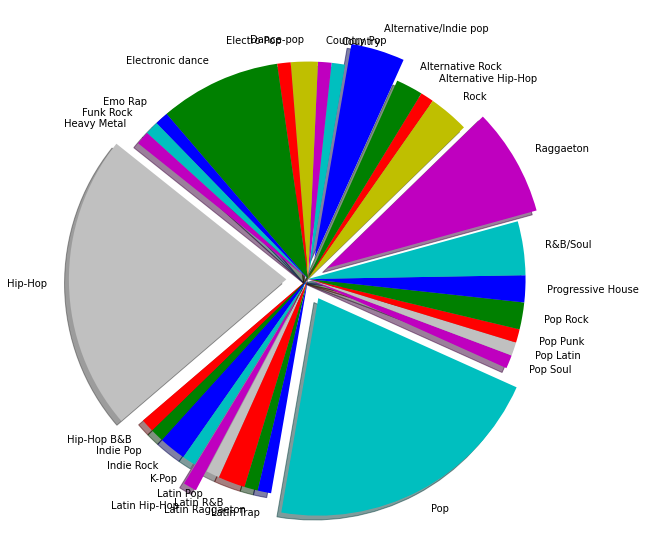

In [191]:
#Merged (Raggaeton & Reggaeton) also  (Progressive House & progressive house electro house)

label_1 = ["Alternative Hip-Hop", "Alternative Rock", "Alternative/Indie pop", "Country", 
           "Country Pop", "Dance-pop", "Electro Pop", "Electronic dance", 
           "Emo Rap", "Funk Rock ", "Heavy Metal", "Hip-Hop", 
           "Hip-Hop B&B", "Indie Pop", "Indie Rock", "K-Pop", 
           "Latin Hip-Hop", "Latin Pop", "Latin R&B", "Latin Raggaeton", 
           "Latin Trap", "Pop", "Pop Soul", "Pop Latin", 
           "Pop Punk", "Pop Rock", "Progressive House", "R&B/Soul", 
           "Raggaeton", "Rock"]
sizes_1 = [1, 2, 4, 1, 1, 2, 1, 9, 1, 1, 1, 22, 1, 1, 2, 1, 1, 1, 2, 1, 1, 21, 1, 1, 1, 2, 2, 4, 8, 3]
colors = ['r','g','b','c','m','y','r','g','b','c','m','silver','r','g','b','c','m','silver','r','g','b','c','m','silver',
         'r','g','b','c','m','y']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 10))           
plt.pie(sizes_1, labels=label_1, explode= explode, colors=colors, shadow=True, startangle=55)
plt.savefig("Figures/Project_1_Pie_Chart.png")
          

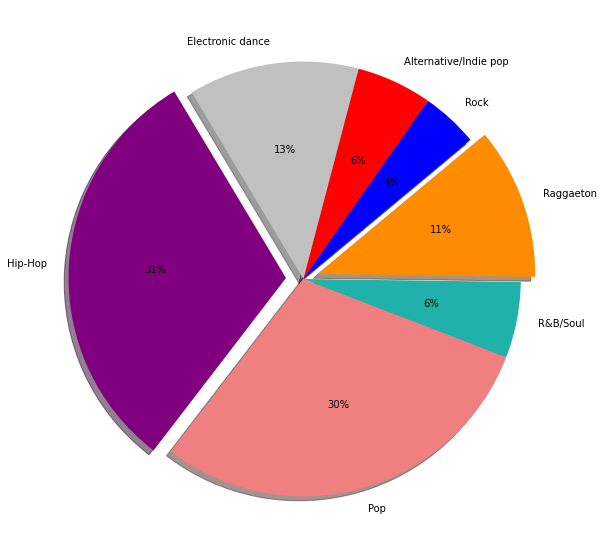

In [192]:
# using the top 7 categories to create pie chart (*****NOTE due to typo merging 'Raggaeton' and 'Reggaeton')

labels = ["Alternative/Indie pop", "Electronic dance", "Hip-Hop", "Pop", "R&B/Soul", "Raggaeton", "Rock" ]

sizes = [4, 9, 22, 21, 4, 8, 3]

colors = ['r','silver','purple','lightcoral','lightseagreen','darkorange', 'b']

explode = (0, 0, 0.08, 0, 0, 0.07, 0)
fig1, ax1 = plt.subplots(figsize=(10, 10)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=55)
plt.savefig("Figures/Project_1_Pie_chart2.png")